In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid", context="notebook", palette="muted", font="Arial")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [3]:
# importing the dataset
iris_data =pd.read_csv('IRIS.csv')
iris_data.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [5]:
# checking the shape of the dataset
iris_data.shape

(150, 5)

In [7]:
# checking the info about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# checking the columns in the dataset
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
# checking the statistical info about the dataset
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# checking if there is null value in the dataset
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
# checking if there is a duplicate value in the dataset
iris_data.duplicated().sum()

3

In [17]:
# now droping the duplicated value
iris_data.drop_duplicates(inplace=True)

In [19]:
# checking back the shape of the data after dropping the duplicates
iris_data.shape

(147, 5)

In [21]:
# checking the correlation of the dataset
iris_data.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


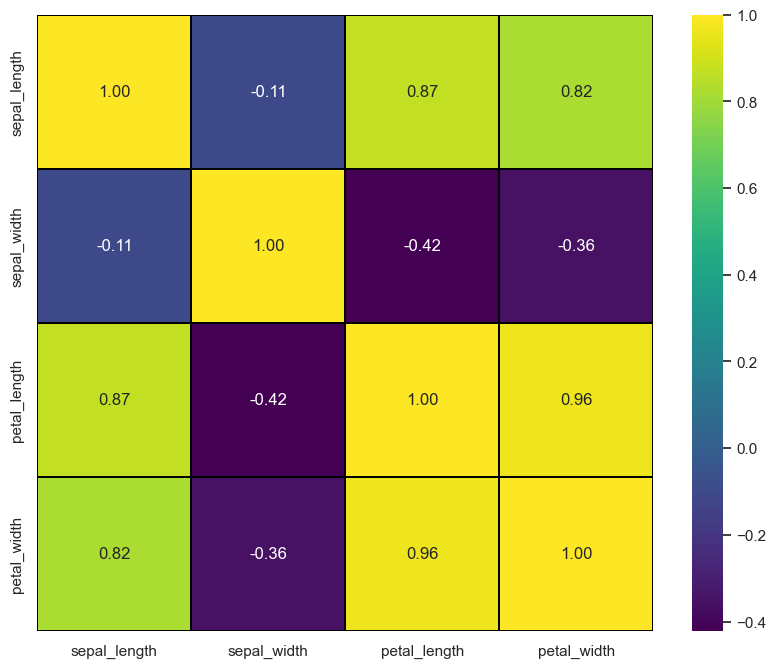

In [23]:
# visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(iris_data.corr(numeric_only=True),annot=True,cmap='viridis',linewidths=0.1,linecolor='black',fmt='.2f',square=True)
plt.show()

Showing the distribution of the numerical variable

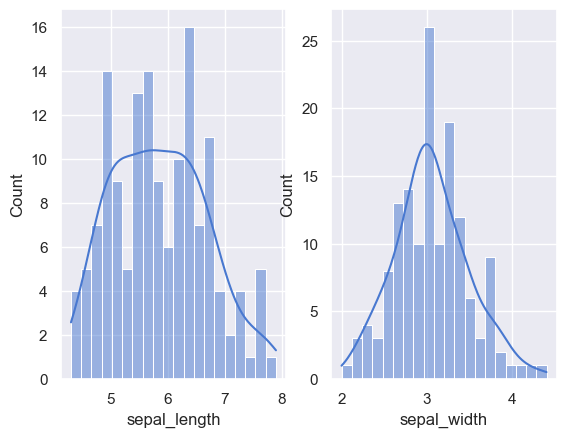

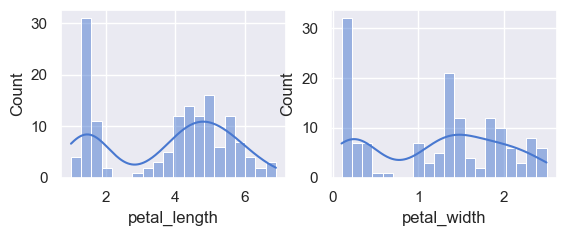

In [26]:
plt.subplot(1,2,1)
sns.histplot(data=iris_data,x='sepal_length',bins=20,kde=True)

plt.subplot(1,2,2)
sns.histplot(data=iris_data,x='sepal_width',bins=20,kde=True)
plt.show()


plt.subplot(2,2,1)
sns.histplot(data=iris_data,x='petal_length',bins=20,kde=True)

plt.subplot(2,2,2)
sns.histplot(data=iris_data,x='petal_width',bins=20,kde=True)

plt.show()

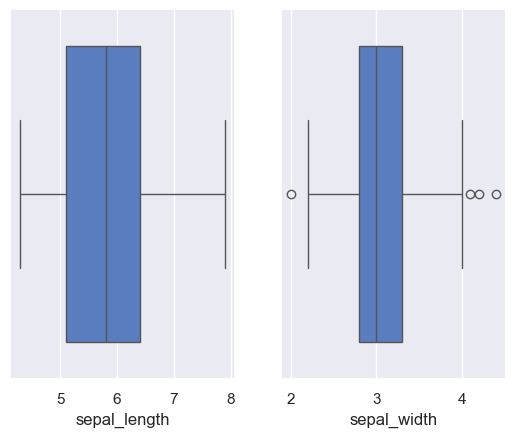

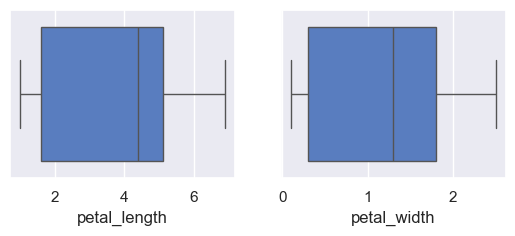

In [27]:
# checking for the outliers

plt.subplot(1,2,1)
sns.boxplot(data=iris_data,x='sepal_length')

plt.subplot(1,2,2)
sns.boxplot(data=iris_data,x='sepal_width')
plt.show()


plt.subplot(2,2,1)
sns.boxplot(data=iris_data,x='petal_length')

plt.subplot(2,2,2)
sns.boxplot(data=iris_data,x='petal_width')

plt.show()

In [28]:
# removing the outliers in the sepal width column

Q1 =iris_data['sepal_width'].quantile(0.25)
Q3 = iris_data['sepal_width'].quantile(0.75)

IQR = Q3 - Q1

lower_bound =Q1 - 1.5 * IQR
upper_bound =Q1 + 1.5 * IQR

iris = iris_data[(iris_data['sepal_width'] >= lower_bound) & (iris_data['sepal_width'] <= upper_bound)]


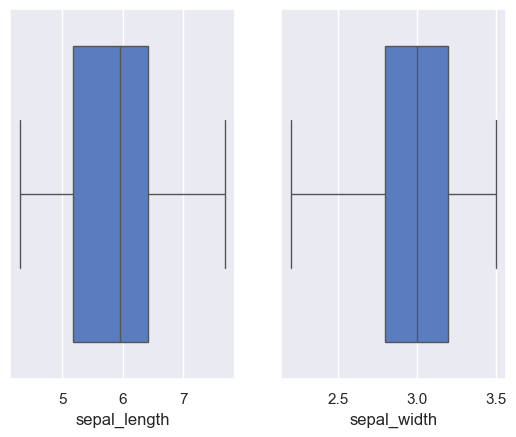

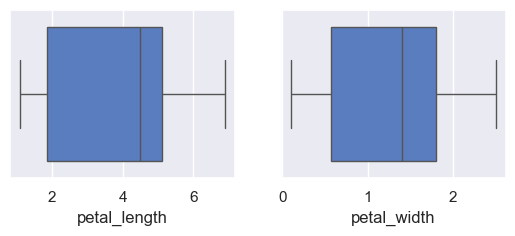

In [30]:
# checking for the outliers

plt.subplot(1,2,1)
sns.boxplot(data=iris,x='sepal_length')

plt.subplot(1,2,2)
sns.boxplot(data=iris,x='sepal_width')
plt.show()


plt.subplot(2,2,1)
sns.boxplot(data=iris,x='petal_length')

plt.subplot(2,2,2)
sns.boxplot(data=iris,x='petal_width')

plt.show()

Visualizing the relationship between numerical column and the target variables


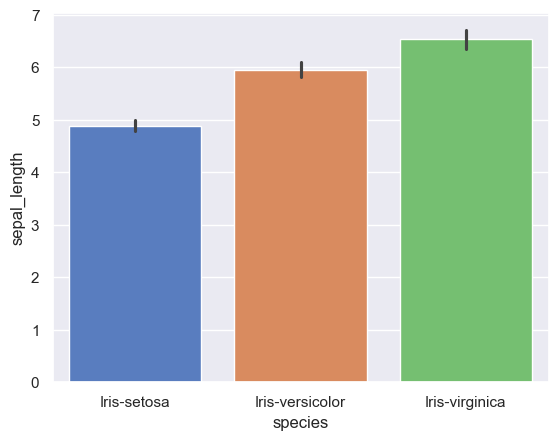

In [34]:
sns.barplot(data=iris, y='sepal_length',x='species',palette='muted')
plt.show()

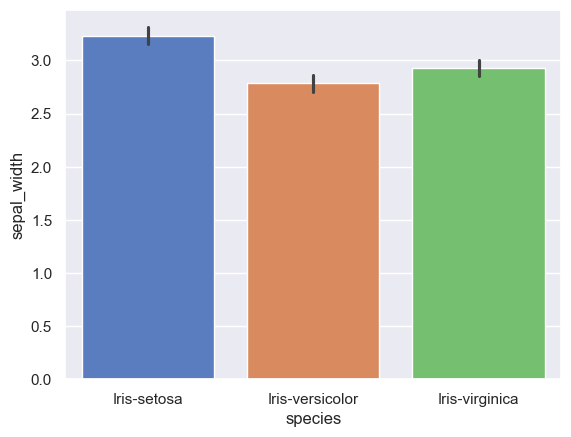

In [36]:
sns.barplot(data=iris, y='sepal_width',x='species',palette='muted')
plt.show()

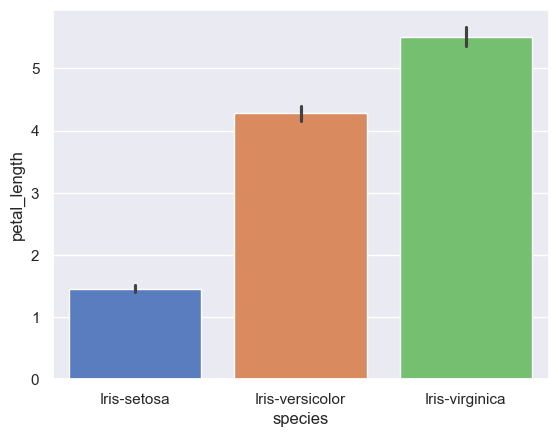

In [37]:
sns.barplot(data=iris, y='petal_length',x='species',palette='muted')
plt.show()

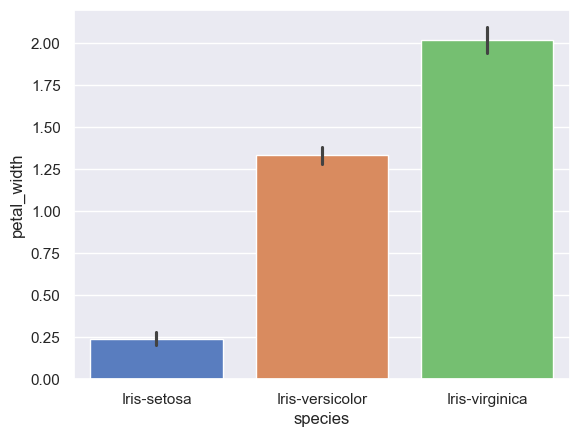

In [39]:
sns.barplot(data=iris, y='petal_width',x='species',palette='muted')
plt.show()

In [42]:
# Distribution of the target variables
iris['species'].value_counts()

species
Iris-versicolor    49
Iris-virginica     46
Iris-setosa        33
Name: count, dtype: int64

In [53]:
# Encoding the target variables into a numerical 
encoder= LabelEncoder()
iris['species']=encoder.fit_transform(iris['species'])

In [55]:
# checking back the dataset after the label encoder
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [57]:
# checking the value count of the target variable
iris['species'].value_counts()

species
1    49
2    46
0    33
Name: count, dtype: int64

In [59]:
# spliting the variable into dependent and target variable
X=iris.drop('species',axis=1)
y=iris['species']

In [69]:
# split the variable into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
# standardizing the variable
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

INITIALIZING THE MODELS

In [83]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred=lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test,y_pred)
lr_classification = classification_report(y_test,y_pred)

array([1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1])

In [89]:
lr_accuracy

1.0

In [93]:
print(lr_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [127]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled,y_train)
y_pred_dt=dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
dt_classification =classification_report(y_test,y_pred_dt)

In [129]:
dt_accuracy

0.9743589743589743

In [131]:
print(dt_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39



In [133]:
# Random forest classifier
rf_model =RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy =accuracy_score(y_test,y_pred_rf)
rf_classification = classification_report(y_test,y_pred_rf)

In [135]:
rf_accuracy

1.0

In [117]:
print(rf_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

